# Retrieval results

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from netCDF4 import Dataset
import glob
import matplotlib.pyplot as plt
import numpy as np
from joint_flight.results import get_results, plot_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
shapes = ["6-BulletRosette",
          "LargeColumnAggregate",
          "8-ColumnAggregate",
          "LargePlateAggregate",
          "EvansSnowAggregate"]
results_b984_ro = get_results("b984", "radar_only", "Radar only")
results_b984 = get_results("b984")
results_c159_ro = get_results("c159", "radar_only", "Radar only")
results_c159 = get_results("c159")

## Residual distributions

/home/simonpf/src/joint_flight/joint_flight/results.py:424: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  )
/home/simonpf/src/joint_flight/joint_flight/results.py:424: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  )
/home/simonpf/src/joint_flight/joint_flight/results.py:424: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass s

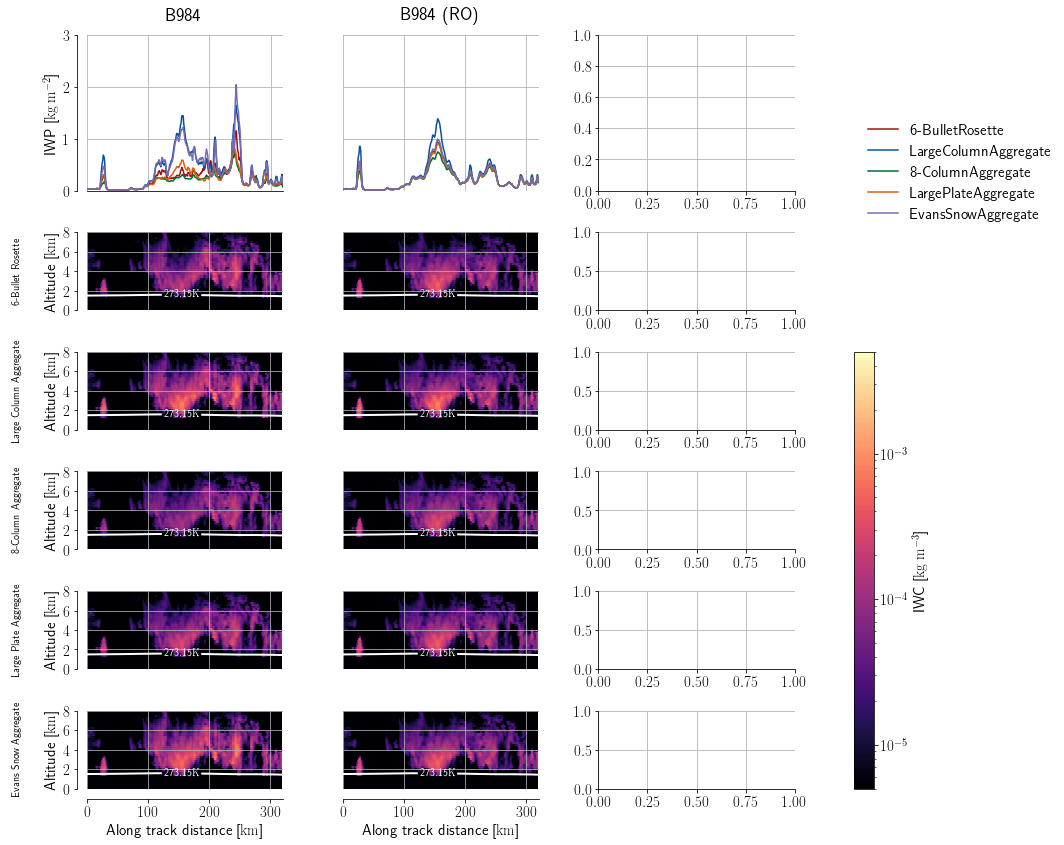

In [17]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from joint_flight.data.b984 import RADAR as radar_b984
from joint_flight.data.c159 import RADAR as radar_c159
from joint_flight.data.c161 import RADAR as radar_c161
from joint_flight.data.b984 import ATMOSPHERE as atmosphere_b984
from joint_flight.data.c159 import ATMOSPHERE as atmosphere_c159
from joint_flight.data.c161 import ATMOSPHERE as atmosphere_c161

m = len(shapes) + 1
gs = GridSpec(m, 5,
              width_ratios=[0.1, 1.0, 1.0, 1.0, 0.1],
              height_ratios=[1.5] + len(shapes) * [0.75])
f = plt.figure(figsize=(15, 12))
names = [f.add_subplot(gs[i, 0]) for i in range(m)]
axs_b984 = [f.add_subplot(gs[i, 1]) for i in range(m)]
axs_c159 = [f.add_subplot(gs[i, 2]) for i in range(m)]
axs_c161 = [f.add_subplot(gs[i, 3]) for i in range(m)]
legends = [f.add_subplot(gs[:2, -1]), f.add_subplot(gs[2:, -1])]

plot_results(radar_b984, results_b984, atmosphere_b984, axs=axs_b984, legends=legends, shapes=shapes, names=names)
plot_results(radar_b984, results_b984_ro, atmosphere_b984, axs=axs_c159, shapes=shapes, y_axis=False)
axs_b984[0].set_title("B984", weight="bold", pad=15)
axs_c159[0].set_title("B984 (RO)", weight="bold", pad=15)

plt.tight_layout()
plt.show()
f.savefig(
    "../plots/ice_water_content_ro.png",
    bbox_inches="tight"
)

## Comparison to nevzorov data

In [18]:
from joint_flight.data.b984 import NEVZOROV as nevzorov_b984
from joint_flight.data.c159 import NEVZOROV as nevzorov_c159
from joint_flight.results import match_bulk_properties

In [19]:
from joint_flight.results import get_distance_mask, get_domain_mask
results_b984 = {k: results_b984[k] for k in shapes}
results_b984_ro = {k: results_b984_ro[k] for k in shapes}
mask_b984 = get_distance_mask(radar_b984, nevzorov_b984)
matched_b984 = match_bulk_properties(results_b984,
                                     mask_b984,
                                     radar_b984,
                                     nevzorov_b984)
matched_b984_ro = match_bulk_properties(results_b984_ro,
                                     mask_b984,
                                     radar_b984,
                                     nevzorov_b984)

results_c159 = {k: results_c159[k] for k in shapes}
mask_c159 = get_domain_mask(radar_c159, 50e3, 200e3, nevzorov_c159)
matched_c159 = match_bulk_properties(results_c159,
                                     mask_c159,
                                     radar_c159,
                                     nevzorov_c159)
matched_c159_ro = match_bulk_properties(results_c159_ro,
                                        mask_c159,
                                        radar_c159,
                                        nevzorov_c159)

In [20]:
matched_c159_ro

<xarray.Dataset>
Dimensions:            (samples: 6165, shapes: 5)
Coordinates:
  * shapes             (shapes) <U20 'LargePlateAggregate' ... 'LargeColumnAg...
Dimensions without coordinates: samples
Data variables:
    altitude           (samples) float64 109.3 409.1 ... 1.052e+04 1.082e+04
    d                  (samples) float64 5.035e+04 5.035e+04 ... 1.992e+05
    ice_water_content  (shapes, samples) float32 2.798e-27 ... 6.436e-07
    number_density     (shapes, samples) float64 0.0 0.0 0.0 ... 8.263e+04 0.0

/home/simonpf/src/joint_flight/joint_flight/results.py:536: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad((0, 0, 0, 0))
/home/simonpf/src/joint_flight/joint_flight/results.py:536: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad((0, 0, 0, 0))


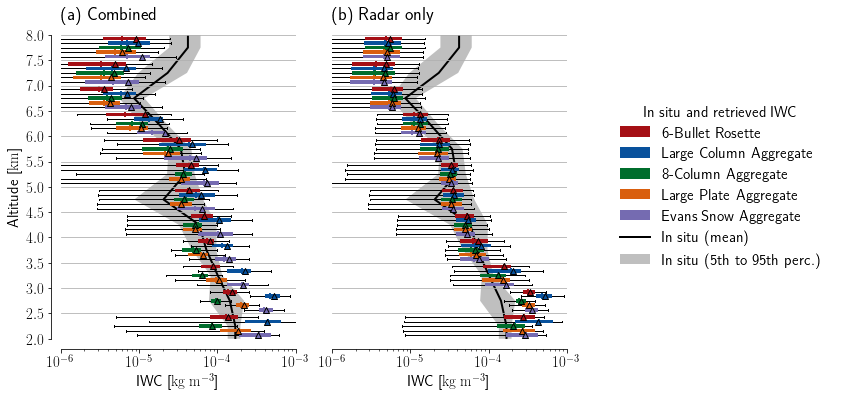

In [194]:
from joint_flight.results import plot_bulk_properties
from matplotlib.gridspec import GridSpec

f = plt.figure(figsize=(15, 9))
gs = GridSpec(2, 4, height_ratios=[0.4, 1.0], width_ratios=[0.1, 1.0, 1.0, 1.0], wspace=0.2, hspace=0.3)
axs_b984 = [f.add_subplot(gs[i, 1]) for i in range(2)]
axs_b984_ro = [f.add_subplot(gs[i, 2]) for i in range(2)]
legends = [f.add_subplot(gs[i, 3]) for i in range(2)]

plot_bulk_properties(nevzorov_b984,
                     matched_b984,
                     radar_b984,
                     mask_b984,
                     cbs=cbs,
                     shapes=shapes,
                     axs=axs_b984)
plot_bulk_properties(nevzorov_b984,
                     matched_b984_ro,
                     radar_b984,
                     mask_b984,
                     axs=axs_b984_ro,
                     cbs=cbs,
                     shapes=shapes,
                     legends=legends,
                     y_axis=False)
axs_b984[0].remove()
axs_b984_ro[0].remove()
axs_b984[1].set_title("(a) Combined", loc="left", pad=15)
axs_b984_ro[1].set_title("(b) Radar only", loc="left", pad=15)
legends[0].remove()
f.savefig(
    "../plots/in_situ_iwc_radar_only.png",
    dpi=300
)

In [102]:
np.percentile

<function numpy.percentile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)>

In [166]:
from joint_flight.results import calculate_iwp
iwp = calculate_iwp(nevzorov_b984, matched_b984_ro, shapes)

In [169]:
s = rf"""\begin{{tabular}}{{l|c}}
Nevzorov & ${iwp["nevzorov"].mean():0.4f} \pm {iwp["nevzorov"].std():0.4f}$ \\
"""

for shape in shapes:
    s += f"{shape} & ${iwp[shape].mean():0.4f} \pm {iwp[shape].std():0.4f}$ \\\\ \n"
s+= "\end{tabular}"

In [170]:
print(s)

\begin{tabular}{l|c}
Nevzorov & $0.3623 \pm 0.0245$ \\
6-BulletRosette & $0.4971 \pm 0.0826$ \\ 
LargeColumnAggregate & $0.6783 \pm 0.1418$ \\ 
8-ColumnAggregate & $0.4116 \pm 0.0579$ \\ 
LargePlateAggregate & $0.4664 \pm 0.0863$ \\ 
EvansSnowAggregate & $0.5073 \pm 0.0945$ \\ 
\end{tabular}


In [124]:
from joint_flight.results import plot_bulk_properties
from matplotlib.gridspec import GridSpec

f = plt.figure(figsize=(15, 9))
gs = GridSpec(2, 5, height_ratios=[0.4, 1.0], width_ratios=[0.1, 1.0, 1.0, 0.05, 1.5], wspace=0.2, hspace=0.3)
axs_c159 = [f.add_subplot(gs[i, 1]) for i in range(2)]
axs_c159_ro = [f.add_subplot(gs[i, 2]) for i in range(2)]
cbs = [f.add_subplot(gs[i, 3]) for i in range(2)]
legends = [f.add_subplot(gs[i, 4]) for i in range(2)]


plot_bulk_properties(nevzorov_c159,
                     matched_c159,
                     radar_c159,
                     mask_c159,
                     cbs=cbs,
                     shapes=shapes,
                     axs=axs_c159)
plot_bulk_properties(nevzorov_c159,
                     matched_c159_ro,
                     radar_c159,
                     mask_c159,
                     axs=axs_c159_ro,
                     cbs=cbs,
                     shapes=shapes,
                     legends=legends,
                     y_axis=False)
axs_c159[0].remove()
axs_c159_ro[0].remove()
cbs[0].remove()
axs_c159[1].set_title("(a) Combined", loc="left", pad=15)
axs_c159_ro[1].set_title("(b) Radar only", loc="left", pad=15)
legends[0].remove()
f.savefig("../plots/in_situ_iwc_radar_only_c159.png", dpi=300)

(12, 11) 13
[2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ] [[-1.80674211e-05 -1.62597924e-05 -1.44521637e-05 -1.26445350e-05
  -1.08369063e-05 -9.93309193e-06 -9.02927758e-06 -7.22164887e-06
  -5.41402016e-06 -3.60639145e-06 -1.79876274e-06]
 [-5.07871041e-04 -5.04684292e-04 -5.01497544e-04 -4.98310796e-04
  -4.95124048e-04 -4.93530674e-04 -4.91937299e-04 -4.88750551e-04
  -4.85563803e-04 -4.82377055e-04 -4.79190306e-04]
 [-1.99681773e-03 -1.98097075e-03 -1.96512377e-03 -1.94927678e-03
  -1.93342980e-03 -1.92550631e-03 -1.91758281e-03 -1.90173583e-03
  -1.88588885e-03 -1.87004186e-03 -1.85419488e-03]
 [ 1.15361338e-02  1.15508327e-02  1.15655316e-02  1.15802305e-02
   1.15949294e-02  1.16022788e-02  1.16096282e-02  1.16243271e-02
   1.16390260e-02  1.16537249e-02  1.16684237e-02]
 [ 2.79832434e-02  2.80327728e-02  2.80823021e-02  2.81318315e-02
   2.81813608e-02  2.82061255e-02  2.82308901e-02  2.82804195e-02
   2.83299488e-02  2.83794781e-02  2.84290075e-02]
 [ 3.44111035e-03  

/home/simonpf/src/joint_flight/joint_flight/results.py:536: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad((0, 0, 0, 0))


ValueError: operands could not be broadcast together with shapes (13,) (12,) 

ValueError: 
\si{\kilo \meter}
^
Unknown symbol: \si, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x648 with 8 Axes>

In [122]:
plt.fill_betweenx?

In [23]:
from joint_flight.results import calculate_psds
psd_r_b984 = calculate_psds(results_b984,
                            mask_b984,
                            radar_b984)
psd_r_b984_ro = calculate_psds(results_b984_ro,
                               mask_b984,
                               radar_b984)
psd_r_c159 = calculate_psds(results_c159,
                            mask_c159,
                            radar_c159)
psd_r_c159_ro = calculate_psds(results_c159_ro,
                               mask_c159,
                               radar_c159)

/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean o

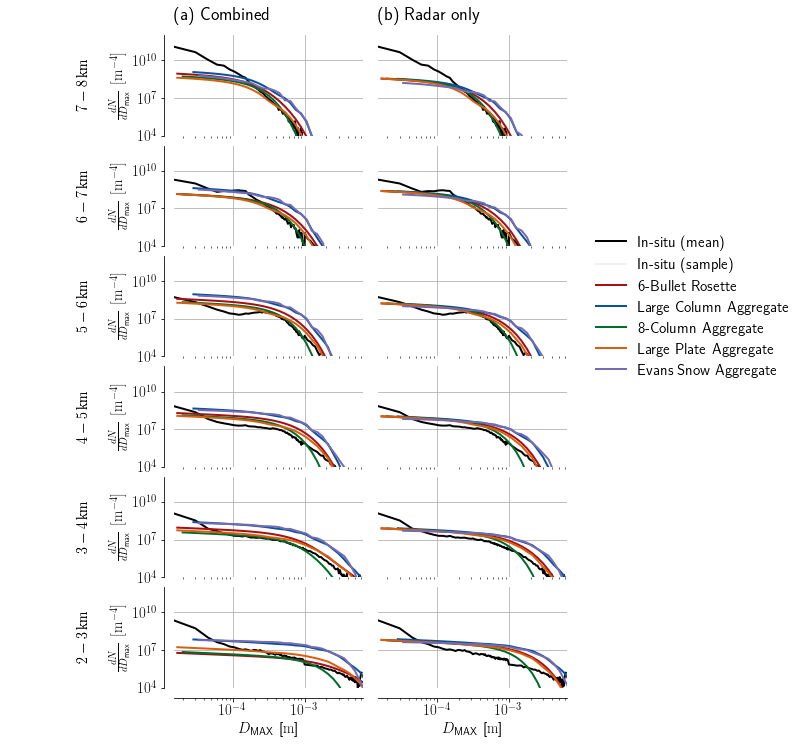

In [24]:
from joint_flight.data.b984 import PSD as psd_b984
from joint_flight.results import plot_psds
psd_b984 = psd_b984.resample(time="10s").mean()
psd_b984_ro = psd_b984.resample(time="10s").mean()
nevzorov_b984 = nevzorov_b984.resample(time="10s").mean()
nevzorov_b984_ro = nevzorov_b984.resample(time="10s").mean()

fig = plt.figure(figsize=(12, 12))
gs = GridSpec(6, 4, width_ratios=[0.8, 1.0, 1.0, 0.5], wspace=0.1, hspace=0.1)


names_axs = [plt.subplot(gs[i, 0]) for i in range(6)]
legend_axs = [plt.subplot(gs[i, -1]) for i in range(6)]
axs_b984 = [plt.subplot(gs[i, 1]) for i in range(6)]
axs_b984_ro = [plt.subplot(gs[i, 2], sharey=axs_b984[i]) for i in range(6)]

plot_psds(psd_b984,
          psd_r_b984,
          axs=axs_b984,
          legends=legend_axs,
          shapes=shapes,
          names=names_axs)
plot_psds(psd_b984,
          psd_r_b984_ro,
          axs=axs_b984_ro,
          legends=legend_axs,
          names=names_axs,
          shapes=shapes,
          y_axis=False)
axs_b984[0].set_title("(a) Combined", loc="left", pad=15)
axs_b984_ro[0].set_title("(b) Radar only", loc="left", pad=15)
plt.show()
fig.savefig(
    "../plots/in_situ_psds_radar_only.png",
    bbox_inches="tight",
    dpi=300
)

/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean of empty slice
  axs = [figure.add_subplot(gs[i, 0]) for i in range(1)]
/home/simonpf/src/joint_flight/joint_flight/results.py:858: RuntimeWarning: Mean o

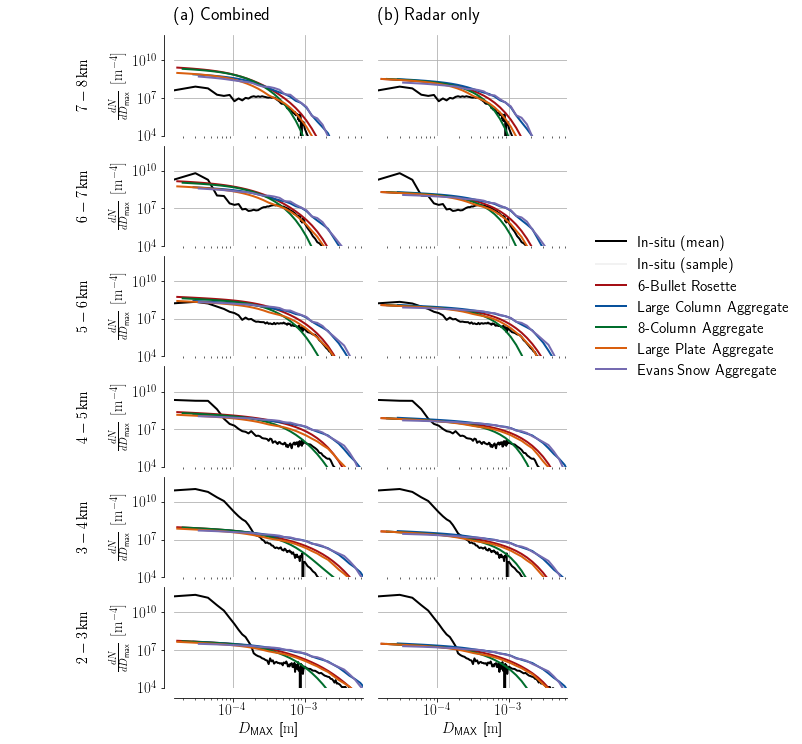

In [25]:
from joint_flight.data.c159 import PSD as psd_c159
from joint_flight.results import plot_psds
psd_c159 = psd_c159.resample(time="10s").mean()
psd_c159_ro = psd_c159.resample(time="10s").mean()
nevzorov_c159 = nevzorov_c159.resample(time="10s").mean()
nevzorov_c159_ro = nevzorov_c159.resample(time="10s").mean()

fig = plt.figure(figsize=(12, 12))
gs = GridSpec(6, 4, width_ratios=[0.8, 1.0, 1.0, 0.5], wspace=0.1, hspace=0.1)


names_axs = [plt.subplot(gs[i, 0]) for i in range(6)]
legend_axs = [plt.subplot(gs[i, -1]) for i in range(6)]
axs_c159 = [plt.subplot(gs[i, 1]) for i in range(6)]
axs_c159_ro = [plt.subplot(gs[i, 2], sharey=axs_c159[i]) for i in range(6)]

plot_psds(psd_c159,
          psd_r_c159,
          axs=axs_c159,
          legends=legend_axs,
          shapes=shapes,
          names=names_axs)
plot_psds(psd_c159,
          psd_r_c159_ro,
          axs=axs_c159_ro,
          legends=legend_axs,
          names=names_axs,
          shapes=shapes,
          y_axis=False)
axs_c159[0].set_title("(a) Combined", loc="left", pad=15)
axs_c159_ro[0].set_title("(b) Radar only", loc="left", pad=15)
plt.show()
fig.savefig(
    "../plots/in_situ_psds_radar_only_c159.png",
    bbox_inches="tight",
    dpi=300
)

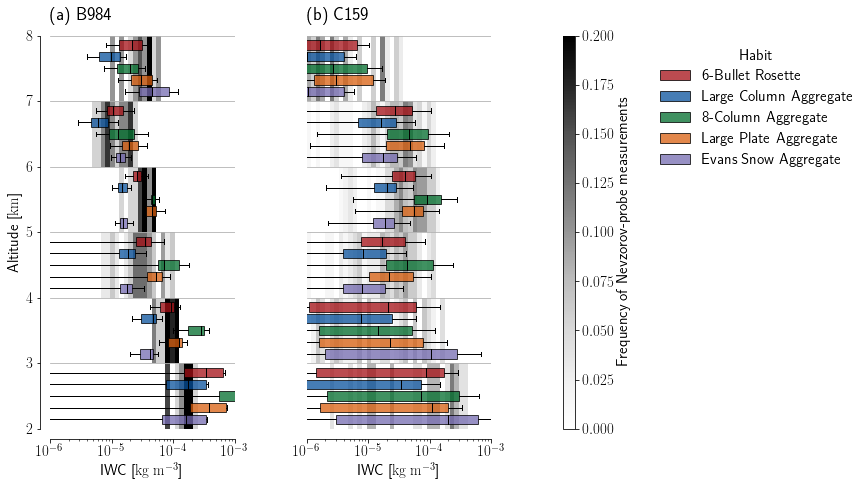

In [12]:
from joint_flight.results import plot_psd_mass
from joint_flight.data.b984 import PSD as psd_b984
from joint_flight.data.c159 import PSD as psd_c159
from joint_flight.results import plot_psds
psd_b984 = psd_b984.resample(time="10s").mean()
psd_c159 = psd_c159.resample(time="10s").mean()
nevzorov_b984 = nevzorov_b984.resample(time="10s").mean()
nevzorov_c159 = nevzorov_c159.resample(time="10s").mean()

fig = plt.figure(figsize=(12, 7))
gs = GridSpec(1, 4, width_ratios=[1.2, 1.2, 0.075, 0.5])

axs_b984 = [fig.add_subplot(gs[i, 0]) for i in range(1)]
axs_c159 = [fig.add_subplot(gs[i, 1]) for i in range(1)]
cbs = [fig.add_subplot(gs[i, 2]) for i in range(1)]
legend_axs = [fig.add_subplot(gs[i, 3]) for i in range(1)]

plot_psd_mass(psd_b984,
              nevzorov_b984,
              axs=axs_b984,
              legends=legend_axs,
              shapes=shapes,
              cbs=cbs,
              names=names_axs)
plot_psd_mass(psd_c159,
              nevzorov_c159,
              axs=axs_c159,
              legends=legend_axs,
              shapes=shapes,
              cbs=cbs,
              names=names_axs,
              y_axis=False)
axs_b984[0].set_title("(a) B984", loc="left", pad=15)
axs_c159[0].set_title("(b) C159", loc="left", pad=15)
plt.tight_layout()
plt.show()

fig.savefig(
    "../plots/mass_size_relations.png",
    bbox_inches="tight",
    dpi=200
)